<a href="https://colab.research.google.com/github/csubham2370/Major-Project-using-ML-and-Python-Framework-Flask/blob/main/Crop_Recommendation_System2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By combining these imports, you're setting up your Python environment for data analysis, visualization, and machine learning tasks while also configuring it to handle warnings in a specific way.

In [1]:
# Importing libraries

from __future__ import print_function # This line imports the 'print_funcation' feature from the '__further__'model.it ensures that the script will use the print funcation from python 3.x even if it's running in a python 2.x environment.

import pandas as pd # This line imports the pandas library and assigns it the alias 'pd'. Pandas is a powerful data manipulation and analysis library for Python.

import numpy as np # This line imports the NumPy library and assigns it the alias 'np'. Numpy ia a fundamental package for numerical computing in Python, provading support for large multi-dimensional arrays and matrices, along with a collection of mathematical funcation to operate on these array.

import matplotlib.pyplot as plt # This line imports the pyplot module from the matplotlib library and assigns it the alias 'plt. Matplotlib is a plotting library for Python, and pyplot provides a MATLAB-like interface for creating and customizing plots.

import seaborn as sns # This line imports the seaborn library and assigns it the alias 'sns'. Seaborn is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

from sklearn.metrics import classification_report # This line imports the 'classification_report' funcation from the 'metrics' module of the scikit-learn library. This funcation generates a comprehensive report for evaluating the performance of a classification model.

from sklearn import metrics # This line imports the 'metrics' module from scikit-learn. scikit-learn is a machine learning library for Python that provides simple and efficent tools for data mining and data analysis. The 'metrics' module contains various metrics for evaluating the performance of machine learning models.

from sklearn import tree # This line imports the tree module from scikit-learn. It provides tools for working with decision trees, which are a type of supervised learning algorithm used for classification and regression tasks.

import warnings # This line imports the warnings module, which provides a mechanism to control the behavior of warnings in Python code.

warnings.filterwarnings('ignore') # This line sets the warning filter to ignore all warnings. This is useful for suppressing warning messages that might not be relevant or useful for the current analysis. However, it's generally recommended to handle specific warnings appropriately rather than ignoring them altogether.

# Upload a file on Google Colab
This code allows the user to upload a file from their local system to a Google Colab notebook environment, and the uploaded file(s) information is stored in the uploaded variable for further processing within the notebook.

In [2]:
from google.colab import drive # Import the 'drive' module from the 'google.colab' package. This module is specifically designed for interacting with Google Drive in the Colab environment.

drive.mount('/content/gdrive') # Mount your Google Drive to the specified directory (/content/gdrive) within the Colab virtual machine. This allows you to access your Google Drive files directly in Colab notebooks as if they were local files. This line will prompt for authorization to access your Google Drive, and you'll need to follow the link, authenticate, and copy the authorization code back into Colab to complete the mounting process.

Mounted at /content/gdrive


# Importing the Data
This code reads the contents of a CSV file named 'modified_crop.csv' using Pandas and stores it in a DataFrame named crop for further processing and analysis in Python.


In [3]:
crop = pd.read_csv('/content/gdrive/My Drive/modified_crop.csv') #This line reads a CSV file named modified_crop.csv located in the My Drive directory of your mounted Google Drive. The function pd.read_csv() from the pandas library is used to load the CSV file into a pandas DataFrame named crop. This allows you to work with the data in the CSV file using pandas' powerful data manipulation tools within your Colab notebook.

crop # This line, when placed at the end of a cell in a Jupyter notebook or a Google Colab notebook, displays the DataFrame crop. It's a simple way to output and view the DataFrame contents directly in the notebook. If this line is part of a script in a different environment, it won't actually display the DataFrame unless wrapped in a print function or similar construct. In a notebook, it helps quickly visualize the data you've loaded.

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/modified_crop.csv'

# crop.shape
This code is use for quickly check the size of your DataFrame, which is especially useful when dealing with large datasets or when you need to understand the structure of the data you're working with.

For example, if you run crop.shape and it returns (100, 5), it means that the DataFrame crop has 100 rows and 5 columns. and the number of elements is 500.

In [ ]:
  crop.shape # This line returns a tuple containing the number of rows and columns in the DataFrame crop.
             # The first element of the tuple represents the number of rows, and the second element represents the number of columns.
             # It's a quick way to ascertain the size or dimensions of the DataFrame, providing insight into the structure and size of the dataset loaded from the CSV file.

             #Tuples are immutable in nature. Thus, we cannot make changes after creating it.

# crop.info()
By using crop.info(), you can quickly get an overview of the DataFrame, including its size, data types, and missing values, which is useful for initial data exploration and understanding the dataset's characteristics.

In [ ]:
crop.info() # This line generates a summary of the DataFrame crop, including information about its index dtype, column dtypes, non-null values,
            # and memory usage. It's a useful method to quickly inspect the data types of each column, the presence of missing values, and an estimate of the memory usage of the DataFrame.
            # This summary helps in understanding the composition of the dataset and identifying potential issues or areas for further exploration or cleaning.
            #Strings are objects in Python. immutable.

# crop.head()
The purpose of using head() is to quickly inspect the structure and content of the DataFrame. It's often used as an initial step in data analysis to get a sense of what the data looks like before performing further operations. By examining the first few rows, you can check the column names, data types, and example values in the DataFrame.

In [ ]:
crop.head() # This line retrieves the first five rows of the DataFrame crop and displays them.
            # The head() method is commonly used to preview the beginning of a DataFrame, providing a quick overview of the data's format,
            # column names, and some sample values. By default, it returns the first five rows, but you can specify a different number of rows to display by passing an argument to the head() method (e.g., crop.head(10),
            # to display the first ten rows). It's particularly useful for understanding the structure of the dataset and identifying any potential issues or patterns at the outset of data analysis.
            # If we passing the 0 as a parameter then only columns are print.

# tail()
The purpose of using tail() is to quickly inspect the end of the DataFrame. It's often used to check for patterns or trends in the data, especially if the data is ordered chronologically or by some other criteria. By examining the last few rows, you can see the most recent data entries and verify that the DataFrame has been properly loaded or processed.

In [ ]:
crop.tail() # This line retrieves the last five rows of the DataFrame crop and displays them.
            # The tail() method is frequently used to preview the end of a DataFrame, offering a rapid overview of the data's format, column names, and some example values.
            # By default, it returns the last five rows, but you can specify a different number of rows to display by passing an argument to the tail() method (e.g., crop.tail(10) to display the last ten rows).
            # It's especially useful for understanding the structure of the dataset and identifying any potential issues or patterns towards the conclusion of data analysis.

# crop.isnull().sum()
crop.isnull().sum() gives you a Series where each entry represents the number of missing values in the corresponding column of the crop DataFrame. This information is useful for identifying and handling missing data in your dataset.

In [ ]:
crop.isnull().sum() # This line applies the isnull() method to the DataFrame crop, which returns a DataFrame of the same shape as crop with True for missing values (NaNs) and False for non-missing values.
                    # Then, the sum() method is applied to this resulting DataFrame, which calculates the sum of True values (i.e., the number of missing values) for each column.
                    # The result is a Series where the index represents column names, and the values represent the total number of missing values in each column.
                    # This summary is useful for identifying columns with missing data and assessing the extent of missingness in the dataset, which informs decisions about data cleaning or imputation strategies.


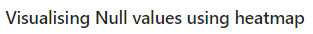

In [ ]:
sns.heatmap(crop.isnull(),yticklabels=False,cbar=True,cmap='viridis') # This line creates a heatmap using Seaborn's heatmap() function. The input to this function is the DataFrame crop with the isnull() method applied,
                                                                      # which returns a DataFrame of the same shape with True for missing values and False for non-missing values.
                                                                      # This DataFrame is used as the data for the heatmap, where missing values are represented as True (1) and non-missing values as False (0).
                                                                      # The yticklabels=False parameter removes the y-axis tick labels, making the heatmap cleaner.
                                                                      # The cbar=True parameter adds a color bar to the side of the heatmap, indicating the scale of the colors.
                                                                      # The cmap='viridis' parameter sets the color map to 'viridis', which is a perceptually uniform color map that helps in distinguishing different levels,
                                                                      # of missingness. The resulting heatmap provides a visual representation of missing values in the dataset,
                                                                      # making it easier to identify patterns of missingness across different columns.

# crop.isnull().sum().sum()
crop.isnull().sum().sum() gives you the total number of missing values in the entire DataFrame crop, summing up the counts of missing values across all columns. This information is valuable for understanding the extent of missing data in your dataset

In [ ]:
crop.isnull().sum().sum()

# crop.duplicated().sum()
crop.duplicated().sum() gives you the total number of duplicated rows in the DataFrame crop. This information is useful for identifying and handling duplicate entries in your dataset.

In [ ]:
crop.duplicated().sum() # This line applies the duplicated() method to the DataFrame crop, which returns a boolean Series indicating whether each row is,
                        # a duplicate of a previous row. The sum() method is then used to count the total number of True values in this Series,
                        # indicating the total number of duplicate rows in the DataFrame. This calculation provides insight into the presence of duplicate data entries in the dataset,
                        # which can affect analysis and should be handled appropriately, such as by removing duplicates to ensure data integrity.

# interpolation
this code snippet ensures that missing values in the DataFrame crop are handled by interpolating them (linear interpolation) and by replacing missing values in the 'label' column with the most frequent label value. The resulting DataFrame crop1 has missing values appropriately handled.

In [ ]:
# crop1 = crop.interpolate()
# most_frequent_label = crop1['label'].mode()[0]
# crop1['label'].fillna(most_frequent_label, inplace=True)

# Handling Null values

In [ ]:
# Atfirst we copy the data into crop1 variable.

crop1 = crop  # This line creates a copy of the DataFrame crop and assigns it to a new variable crop1.
              # This ensures that any modifications made to crop1 won't affect the original DataFrame crop.

              # These lines fill missing values in specific columns of the DataFrame crop1 with predetermined values.
              # Numeric columns are filled with 0, while the 'label' column is filled with the mode value.

# Filling null values in 'Nitrogen' with 0
crop1.N.fillna(0, inplace=True)

# Filling null values in 'Phosphorus' with 0
crop1.P.fillna(0, inplace=True)

# Filling null values in 'Potassium' with 0
crop1.K.fillna(0, inplace=True)

# Filling null values in 'Temperature' with 0
crop1.temperature.fillna(0, inplace=True)

# Filling null values in 'Humidity' with 0
crop1.humidity.fillna(0, inplace=True)

# Filling null values in 'ph' with 0
crop1.ph.fillna(0, inplace=True)

# Filling null values in 'Rainfall' with 0
crop1.rainfall.fillna(0, inplace=True)

#Filling null values in 'Label' with 0
crop1.label.fillna(crop1.label.mode()[0], inplace=True)


# filling the null values with mean +- std in non-binary columns
for column in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:    # This loop fills missing values in numeric columns with the mean plus or minus the standard deviation.
                                                                               # It calculates the mean and standard deviation of each column,
                                                                               # then generates random values within a range centered around the mean,
                                                                               # and finally assigns these random values to the missing entries in each column.
    avg = crop1[column].mean()
    std = crop1[column].std()
    count = crop1[column].isnull().sum()
    random = np.random.randint(avg-std,avg+std,size=count)
    crop1[column][np.isnan(crop1[column])]=random

# Check for null values
sns.heatmap(crop1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

# Describe the data
crop1.describe(include="all")

# Count: The total number of non-missing values in each column.
# Unique: The number of unique categories in the column. This is relevant only for categorical data. NaN indicates that the column is numeric.
# Top: The most frequently occurring category in the column. Again, only relevant for categorical data.
# Freq: The frequency of the top category.
# Mean: The average value of the column.
# Std (Standard Deviation): Measures the amount of variation or dispersion of the data.
# Min: The smallest value in the column.
# 25% (First Quartile): The value below which 25% of the data falls.
# 50% (Median): The middle value of the data.
# 75% (Third Quartile): The value below which 75% of the data falls.
# Max: The largest value in the column.

# Here we recheck if any null value is present or not.

In [ ]:
crop1.isnull().sum()  # This line applies the isnull() method to the DataFrame crop1, resulting in a DataFrame of the same shape with,
                      # True for missing values and False for non-missing values. Then, the sum() method is used to calculate the sum of True values,
                      #  (i.e., the number of missing values) for each column. The result is a Series where the index represents column names,
                      # and the values represent the total number of missing values in each column.
                      # This summary provides an overview of missing values in the dataset after the data preprocessing steps applied earlier.

# Here we recheck if any null value is present or not by heatmap

In [ ]:
sns.heatmap(crop.isnull(),yticklabels=False,cbar=True,cmap='viridis')

# Check the Duplicate values



# crop2 = crop1.drop_duplicates()
the DataFrame crop2 contains the data from crop1 with duplicate rows removed. This operation ensures that each row in crop2 is unique, based on all columns by default.

In [ ]:
crop2 = crop1.drop_duplicates()   # This line of code creates a new DataFrame named crop2 by applying the drop_duplicates() method to the DataFrame crop1.
                                  # The drop_duplicates() method removes duplicate rows from the DataFrame based on all columns' values.
                                  # After removing duplicates, the resulting DataFrame crop2 contains only unique rows, with duplicate rows eliminated.
                                  # This operation ensures that each row in the DataFrame crop2 is unique, which can be useful for various analyses where,
                                  # duplicate rows are not desired.


In [ ]:
sns.heatmap(pd.DataFrame(crop2.duplicated()), yticklabels=False, cbar=True, cmap='viridis')

# Here we recheck if any duplicate rows are present or not.

In [ ]:
 crop2.duplicated().sum()  # This line of code applies the duplicated() method to the DataFrame crop2.
                           # The duplicated() method returns a boolean Series indicating whether each row is a duplicate of an earlier row or not.
                           # True values indicate duplicate rows, while False values indicate unique rows.
                           # The sum() method is then used to count the total number of True values in the Series,
                           # representing the total number of duplicate rows in the DataFrame crop2.
                           # This count provides information about the number of duplicate rows remaining in the DataFrame after removing duplicates,
                           # with the drop_duplicates() method earlier. It helps to assess the effectiveness of the duplicate removal process.
                           # If the count is zero, it indicates that no duplicate rows remain in the DataFrame crop2.

# crop2.isnull().any()
returns a Series where each entry represents whether there are any missing values in the corresponding column of the DataFrame crop2. If the entry is True, it means that the column contains at least one missing value; otherwise, it's False.

In [ ]:
crop2.isnull().any() # This line of code applies the isnull() method to the DataFrame crop2.
                     # The isnull() method returns a DataFrame of the same shape as crop2, where each element is True if the corresponding element in crop2 is null (NaN), and False otherwise.
                     # The any() method is then applied to the resulting DataFrame, which returns a boolean Series indicating whether there are any True values along each column axis (axis=0). True indicates the presence of at least one missing value (NaN) in the column, while False indicates that the column contains no missing values.
                     # The output provides information about the presence of missing values in each column of the DataFrame crop2. If a column has True, it means there is at least one missing value in that column. Otherwise, the column contains no missing values.

## After remove the null values and duplicates values we check the shape of the data set

In [ ]:
crop2.shape


# crop2.describe()
The output of crop2.describe() will be a DataFrame where each row represents a summary statistic, and each column represents a numerical column in the original DataFrame crop2. This summary statistics can provide insights into the distribution and spread of values in the dataset, helping with data exploration and analysis.

In [ ]:
crop2.describe() # This line of code calls the describe() method on the DataFrame crop2.
                 # The describe() method computes summary statistics for each numerical column in the DataFrame, including count, mean, standard deviation, minimum, 25th percentile (first quartile), median (50th percentile),
                 # 75th percentile (third quartile), and maximum.
                 # For categorical columns, describe() provides count, unique, top (most frequent value), and freq (frequency of the top value).
                 # This summary provides valuable insights into the central tendency, dispersion, and distribution of numerical data in the DataFrame crop2, as
                 # well as the frequency and distribution of categorical data. It helps in understanding the overall characteristics of the dataset and identifying potential outliers or anomalies.

                 # Describe Function In Python Pandas

* Count: The total number of non-missing values in each column.
* Mean: The average value of the column.
* Std (Standard Deviation): Measures the amount of variation or dispersion of the data.
* Min: The smallest value in the column.
* 25% (First Quartile): The value below which 25% of the data falls.
* 50% (Median): The middle value of the data.
* 75% (Third Quartile): The value below which 75% of the data falls.
* Max: The largest value in the column.

# corr()
The corr() method is commonly used to identify relationships between variables in a dataset. High positive or negative correlation coefficients can indicate strong relationships between variables, while a correlation coefficient close to 0 suggests little to no relationship. These correlation coefficients can be further analyzed and interpreted to gain insights into the dataset.

In [ ]:
crop2_numeric = crop2.select_dtypes(include=[np.number])
corr = crop2_numeric.corr()
corr

# The first line selects only the numeric columns from the DataFrame crop2 and stores them in a new DataFrame called crop2_numeric.
# This is achieved using the select_dtypes() method with the include parameter set to [np.number], which selects columns with numeric data types.
# The second line calculates the correlation matrix for the numeric columns in the DataFrame crop2_numeric.
# The correlation matrix is a square matrix where each entry represents the correlation coefficient between two variables. It indicates the strength and direction of the linear relationship between pairs of variables.
# The third line displays the correlation matrix, showing the correlation coefficients between all pairs of numeric columns in the DataFrame crop2_numeric.
# Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero indicate little to no correlation.
# This matrix helps in understanding the relationships between different variables in the dataset, which is valuable for feature selection, dimensionality reduction, and predictive modeling tasks.

* This correlation matrix represents the correlation coefficients between pairs of numeric variables in the dataset.
* The value of 1.000 along the diagonal represents the correlation of each variable with itself, which is always perfect (perfect positive correlation).
* Off-diagonal values represent the correlation between pairs of variables. Each cell contains the correlation coefficient, which ranges from -1 to 1.
* A value of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other also increases proportionally.
* A value of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other decreases proportionally.
* A value close to 0 indicates little to no linear correlation between the variables.
* For example, the correlation coefficient between 'N' and 'P' is approximately -0.233, indicating a moderate negative correlation between these two variables.
* Similarly, the correlation coefficient between 'K' and 'humidity' is approximately 0.182, indicating a moderate positive correlation between these two variables.

#Visualizing the correlation matrix
 By visualizing the correlation matrix as a heatmap, you can easily identify patterns and relationships between variables in the dataset. Positive correlations will appear in warm colors, negative correlations in cool colors, and no correlation in neutral colors. The annotations provide the exact correlation coefficients, making it easier to interpret the heatmap.

In [ ]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm') # Generate a heatmap to visualize the correlation matrix 'corr' with annotations





**Comments**:
- The `sns.heatmap()` function from the Seaborn library is used to create a heatmap.
- The `corr` parameter specifies the correlation matrix that we want to visualize.
- Setting `annot=True` adds annotations to each cell of the heatmap, displaying the correlation coefficients.
- The `cbar=True` parameter adds a color bar to the side of the heatmap, indicating the scale of the colors.
- The `cmap='coolwarm'` parameter sets the color map to 'coolwarm', which ranges from cool (blue) to warm (red), representing negative and positive correlations respectively.
- This visualization helps in understanding the strength and direction of the linear relationships between pairs of variables in the dataset, making it easier to identify patterns and dependencies.

# size
The .size method in Python is used to get the number of elements in an object, such as a list, tuple, set, or dictionary. However, it seems you've added parentheses to the method, which is not correct for this purpose.

In [ ]:
 crop2.size

* This line of code calculates the total number of elements in the DataFrame crop2.
* The size attribute of a DataFrame returns the total number of elements, which is equal to the number of rows multiplied by the number of columns.
* The result represents the total number of data points or cells in the DataFrame crop2, including both numeric and categorical values.

#columns
The .columns attribute is used to retrieve the column labels of a DataFrame in pandas.

In [ ]:
 crop2.columns # Retrieve the column names of the DataFrame 'crop2'


* This line of code retrieves the column names of the DataFrame crop2.
* The columns attribute of a DataFrame returns an Index object containing the column names.
* The result represents the names of all columns in the DataFrame crop2.

#  crop2['label'].unique()
The code crop2['label'].unique() is used to get the unique values in the 'label' column of the DataFrame crop2.


In [ ]:
crop2['label'].unique() # Retrieve unique values from the 'label' column in the DataFrame 'crop2'



**Comments**:
- This line of code accesses the 'label' column of the DataFrame `crop2`.
- The `.unique()` method is then applied to this column, which returns an array of unique values present in the 'label' column.
- The result represents an array containing all unique values found in the 'label' column of the DataFrame `crop2`.
- This operation is useful for understanding the different categories or classes present in the 'label' column, providing insights into the diversity of crops or labels present in the dataset.

#dtypes
The dtypes attribute in pandas DataFrame is used to get the data types of each column in the DataFrame.

In [ ]:
 crop2.dtypes # Retrieve the data types of each column in the DataFrame 'crop2'

In [ ]:
crop2


**Comments**:
- This line of code returns the data types of each column in the DataFrame `crop2`.
- The `dtypes` attribute of a DataFrame provides information about the data type of each column.
- The result is a Series where the index represents column names, and the values represent the corresponding data types of each column in `crop2`.
- Understanding the data types is important for data manipulation and analysis, as it informs about the nature of the data stored in each column (e.g., integer, float, object, etc.), helping in appropriate data handling and processing.

# crop2['label'].value_counts()

* The output of crop2['label'].value_counts() will be a Series where each unique label in the 'label' column of crop2 is listed along with the count of occurrences of that label in the dataset. This information is useful for understanding the distribution of different labels in the dataset and can be valuable for various analytical purposes.

In [ ]:
crop2['label'].value_counts() # Count the occurrences of each unique value in the 'label' column of the DataFrame 'crop2'




**Comments**:
- This line of code accesses the 'label' column of the DataFrame `crop2`.
- The `.value_counts()` method is then applied to this column, which returns a Series containing the count of each unique value in the 'label' column.
- The index of the resulting Series represents the unique values found in the 'label' column, and the corresponding values represent the frequency of each unique value.
- This operation is useful for understanding the distribution of different categories or classes in the 'label' column, providing insights into the frequency of occurrence of each crop label in the dataset.

#Distribution of values in the 'N' column of the DataFrame crop2.

By executing this code, you'll generate a distribution plot showing the distribution of values in the 'N' column of the DataFrame crop2. This visualization helps in understanding the distribution of values and identifying any patterns or outliers present in the data.

In [ ]:
sns.distplot(crop2['N'])  # Generate a distribution plot (histogram and kernel density estimation) for the 'N' column in DataFrame 'crop2'

plt.show() # Display the plot









**Comments**:
- The `sns.distplot()` function from the Seaborn library is used to create a distribution plot.
- The column 'N' from the DataFrame `crop2` is passed as the data to be plotted.
- This plot combines a histogram and a kernel density estimation (KDE) plot to visualize the distribution of values in the 'N' column.
- The `plt.show()` function is used to display the plot.
- This visualization provides insights into the distribution of values in the 'N' column, including measures of central tendency and spread.

#Distribution of values in the 'P' column of the DataFrame crop2.

By executing this code, you'll generate a distribution plot showing the distribution of values in the 'P' column of the DataFrame crop2. This visualization helps in understanding the distribution of values and identifying any patterns or outliers present in the data.

In [ ]:
sns.distplot(crop2['P'])
plt.show()

#Distribution plot of K, Temperature, Humidity, ph, Rainfall using Seaborn's distplot() function.

In [ ]:
sns.distplot(crop2['K'])
plt.show()

In [ ]:
sns.distplot(crop2['temperature'])
plt.show()

In [ ]:
sns.distplot(crop2['ph'])
plt.show()

In [ ]:
sns.distplot(crop2['rainfall'])
plt.show()

#Checking the outliers

In [ ]:
sns.distplot(crop2['N'])
plt.show()

In [ ]:
sns.distplot(crop2['P'])


In [ ]:
f, axes = plt.subplots(7, 2, figsize=(10, 40))
sns.boxplot(y="N", data=crop1, palette="winter", ax=axes[0][0]).set_title("Before")
plt.grid()

sns.boxplot(y="P", data=crop1, palette="winter", ax=axes[1][0]).set_title("Before")
plt.grid()

sns.boxplot(y="K", data=crop1, palette="winter", ax=axes[2][0]).set_title("Before")
plt.grid()

sns.boxplot(y="temperature", data=crop1, palette="winter", ax=axes[3][0]).set_title("Before")
plt.grid()

sns.boxplot(y="humidity", data=crop1, palette="winter", ax=axes[4][0]).set_title("Before")
plt.grid()

sns.boxplot(y="ph", data=crop1, palette="winter", ax=axes[5][0]).set_title("Before")
plt.grid()



# Check and clean the outliers of P

In [ ]:
sns.boxplot(x=crop2['P'])

In [ ]:
crop3 = crop2.copy()
crop3
len(crop3)

#  Handel the outliers using IQR method

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR for 'P'
Q1 = crop3['P'].quantile(0.25)
Q3 = crop3['P'].quantile(0.75)
IQR = Q3 - Q1

print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

#Find the outliers
# print("The outliers of P")
crop3.loc[(crop3['P'] > upper_limit) | (crop3['P'] < lower_limit)]

#trimming the data
new_df = crop3.loc[(crop3['P'] < upper_limit) & (crop3['P'] > lower_limit)]
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

In [ ]:
sns.boxplot(x=new_df['P'])

In [ ]:
#Capping
new_df = crop3.copy()
new_df.loc[(new_df['P'] > upper_limit), 'P'] = upper_limit
new_df.loc[(new_df['P'] < lower_limit), 'P'] = lower_limit

In [ ]:
sns.boxplot(x=new_df['P'])

# Check and clean the outliers of K

In [ ]:
sns.boxplot(x=crop2['K'])

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR for 'P'
Q1 = crop3['K'].quantile(0.25)
Q3 = crop3['K'].quantile(0.75)
IQR = Q3 - Q1

print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

#Find the outliers
# print("The outliers of P")
crop3.loc[(crop3['K'] > upper_limit) | (crop3['K'] < lower_limit)]

#trimming the data
new_df = crop3.loc[(crop3['K'] < upper_limit) & (crop3['K'] > lower_limit)]
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

In [ ]:
sns.boxplot(x=new_df['K'])

In [ ]:
#Capping
new_df = crop3.copy()
new_df.loc[(new_df['K'] > upper_limit), 'K'] = upper_limit
new_df.loc[(new_df['K'] < lower_limit), 'K'] = lower_limit

In [ ]:
sns.boxplot(x=new_df['K'])

# Check and clean the outliers of temperature

In [ ]:
sns.boxplot(x=crop2['temperature'])

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR for 'P'
Q1 = crop3['temperature'].quantile(0.25)
Q3 = crop3['temperature'].quantile(0.75)
IQR = Q3 - Q1

print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

#Find the outliers
# print("The outliers of P")
crop3.loc[(crop3['temperature'] > upper_limit) | (crop3['temperature'] < lower_limit)]

#trimming the data
new_df = crop3.loc[(crop3['temperature'] < upper_limit) & (crop3['temperature'] > lower_limit)]
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

In [ ]:
sns.boxplot(x=new_df['temperature'])

In [ ]:
#Capping
new_df = crop3.copy()
new_df.loc[(new_df['temperature'] > upper_limit), 'temperature'] = upper_limit
new_df.loc[(new_df['temperature'] < lower_limit), 'temperature'] = lower_limit

In [ ]:
sns.boxplot(x=new_df['temperature'])

#  Check and clean the outliers of humidity

In [ ]:
sns.boxplot(x=crop3['humidity'])

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR for 'P'
Q1 = crop3['humidity'].quantile(0.25)
Q3 = crop3['humidity'].quantile(0.75)
IQR = Q3 - Q1

print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

#Find the outliers
# print("The outliers of P")
crop3.loc[(crop3['humidity'] > upper_limit) | (crop3['humidity'] < lower_limit)]

#trimming the data
new_df = crop3.loc[(crop3['humidity'] < upper_limit) & (crop3['humidity'] > lower_limit)]
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

In [ ]:
sns.boxplot(x=new_df['humidity'])

In [ ]:
#Capping
new_df = crop3.copy()
new_df.loc[(new_df['humidity'] > upper_limit), 'humidity'] = upper_limit
new_df.loc[(new_df['humidity'] < lower_limit), 'humidity'] = lower_limit

In [ ]:
sns.boxplot(x=new_df['humidity'])

# Check and clean the outliers of ph

In [ ]:
sns.boxplot(x=crop3['ph'])

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR for 'ph'
Q1 = crop3['ph'].quantile(0.25)
Q3 = crop3['ph'].quantile(0.75)
IQR = Q3 - Q1

print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

#Find the outliers
# print("The outliers of P")
crop3.loc[(crop3['ph'] > upper_limit) | (crop3['ph'] < lower_limit)]

#trimming the data
new_df = crop3.loc[(crop3['ph'] < upper_limit) & (crop3['ph'] > lower_limit)]
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

In [ ]:
sns.boxplot(x=new_df['ph'])

In [ ]:
#Capping
new_df = crop3.copy()
new_df.loc[(new_df['ph'] > upper_limit), 'ph'] = upper_limit
new_df.loc[(new_df['ph'] < lower_limit), 'ph'] = lower_limit

In [ ]:
sns.boxplot(x=new_df['ph'])

# Check and clean the outliers of rainfall

In [ ]:
sns.boxplot(x=crop3['rainfall'])

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR for 'rainfall'
Q1 = crop3['rainfall'].quantile(0.25)
Q3 = crop3['rainfall'].quantile(0.75)
IQR = Q3 - Q1

print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

#Find the outliers
# print("The outliers of P")
crop3.loc[(crop3['rainfall'] > upper_limit) | (crop3['rainfall'] < lower_limit)]

#trimming the data
new_df = crop3.loc[(crop3['rainfall'] < upper_limit) & (crop3['rainfall'] > lower_limit)]
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

In [ ]:
sns.boxplot(x=new_df['rainfall'])

In [ ]:
#Capping
new_df = crop3.copy()
new_df.loc[(new_df['rainfall'] > upper_limit), 'rainfall'] = upper_limit
new_df.loc[(new_df['rainfall'] < lower_limit), 'rainfall'] = lower_limit

In [ ]:
sns.boxplot(x=new_df['rainfall'])

# Visualising other attributes with respect to our target column i.e. 'Label'


In [ ]:
f, axes = plt.subplots(7, 1, figsize=(10, 40))

sns.barplot(x=new_df.N, y=crop2.label, ax=axes.flat[0])

sns.barplot(x=new_df.P, y=crop2.label, ax=axes.flat[1])

sns.barplot(x=new_df.K, y=crop2.label, ax=axes.flat[2])

sns.barplot(x=new_df.temperature, y=crop2.label, ax=axes.flat[3])

sns.barplot(x=new_df.ph, y=crop2.label, ax=axes.flat[4])

sns.barplot(x=new_df.humidity, y=crop2.label, ax=axes.flat[5])

sns.barplot(x=new_df.rainfall, y=crop2.label, ax=axes.flat[6])



# Seperating features and target label
 this code prepares your data by selecting relevant features and the target variable for use in a machine learning model. The features are the input variables used to make predictions, while the target variable is the output variable you want to predict.

In [ ]:
features =  new_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target =   new_df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels =   new_df['label']

# Initialzing empty lists to append all model's name and corresponding name
By initializing these lists, you're setting up a structure to collect and organize the results of model evaluation, likely for comparison or further analysis. As you evaluate different models, you can append their accuracy scores to the acc list and their names to the model list, allowing you to track and analyze the performance of each model.


In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

### The line **from sklearn.model_selection import train_test_split** imports the train_test_split function from the sklearn.model_selection module. This function is commonly used in machine learning to split datasets into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

### The line **Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)** uses the train_test_split function from scikit-learn to split the dataset into training and testing sets.

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.25,random_state =2)


# Now we will train our model

In machine learning (ML), model training involves the process of feeding data into a machine learning algorithm or model to enable it to learn patterns, relationships, and insights from the data.

##Decision Tree
Decision tree training involves recursively partitioning the input space (feature space) into smaller regions while aiming to minimize impurity or maximize information gain at each step.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

DecisionTree.fit(Xtrain, Ytrain)
predicted_values_train = DecisionTree.predict(Xtrain)

training_accuracy = accuracy_score(Ytrain, predicted_values_train)
print("Training Accuracy:", training_accuracy)

predicted_values_test = DecisionTree.predict(Xtest)
testing_accuracy = accuracy_score(Ytest, predicted_values_test)
acc.append(testing_accuracy)
model.append('Decision Tree')
print("Decision Tree's Testing Accuracy:", testing_accuracy)

print("Classification Report for Testing Data:")
print(classification_report(Ytest, predicted_values_test))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, predicted_values_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,predicted_values_test))
plt.title(all_sample_title, size = 15);
plt.show()

# from sklearn.model_selection import cross_val_score

This line of code imports the cross_val_score function from the model_selection module of scikit-learn.cross_val_score is used for cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score


# Cross validation score (Decision Tree)
After executing this line of code, score will contain an array of cross-validated scores, allowing you to assess the performance of your decision tree model across multiple train-test splits of the data. These scores can then be used to estimate the model's generalization ability and variability.

In [ ]:
score = cross_val_score(DecisionTree, features, target,cv=5)


#score
The variable score contains the cross-validated scores obtained from the cross_val_score function. These scores represent the performance of the decision tree model (DecisionTree) across different folds of the cross-validation process

In [ ]:
score

In [ ]:

print("Mean CV score: {0:.2f}".format(score.mean()))

### Saving trained Decision Tree model
To save a trained Decision Tree classifier using the pickle module in Python.

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '/content/gdrive/My Drive/models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes
Gaussian Naive Bayes (GNB) is a variant of the Naive Bayes algorithm that assumes the features are continuous and follows a Gaussian (normal) distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain, Ytrain)

predicted_values_train = NaiveBayes.predict(Xtrain)

training_accuracy = accuracy_score(Ytrain, predicted_values_train)
print("Training Accuracy:", training_accuracy)

predicted_values_test = NaiveBayes.predict(Xtest)
testing_accuracy = accuracy_score(Ytest, predicted_values_test)
acc.append(testing_accuracy)
model.append('Naive Bayes')
print("Naive Bayes's Testing Accuracy:", testing_accuracy)

print("Classification Report for Testing Data:")
print(classification_report(Ytest, predicted_values_test))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, predicted_values_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,predicted_values_test))
plt.title(all_sample_title, size = 15);
plt.show()

# Cross validation score (NaiveBayes)

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

In [ ]:
print("Mean CV score: {0:.2f}".format(score.mean()))


### Saving trained Guassian Naive Bayes model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '/content/gdrive/My Drive/models//NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)

# Transform training and testing data
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

# Initialize and train the SVM model
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm, Ytrain)

# Predictions and evaluation on training data
predicted_values_train = SVM.predict(X_train_norm)
training_accuracy = accuracy_score(Ytrain, predicted_values_train)
print("Training Accuracy:", training_accuracy)

# Predictions and evaluation on testing data
predicted_values_test = SVM.predict(X_test_norm)
testing_accuracy = accuracy_score(Ytest, predicted_values_test)
# print("Testing Accuracy:", testing_accuracy)

# Append accuracy and model name to respective lists
acc.append(testing_accuracy)
model.append('SVM')

# Print testing accuracy and classification report
print("SVM's Testing Accuracy:", testing_accuracy)
print("Classification Report for Testing Data:")
print(classification_report(Ytest, predicted_values_test))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, predicted_values_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,predicted_values_test))
plt.title(all_sample_title, size = 15);
plt.show()

# Cross validation score (SVM)

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

In [ ]:
print("Mean CV score: {0:.2f}".format(score.mean()))



In [ ]:
testing_accuracy = accuracy_score(Ytest, predicted_values_test)
print("SVM's Testing Accuracy:",testing_accuracy)

#Saving trained SVM model

In [ ]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '/content/gdrive/My Drive/models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression
Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain, Ytrain)

predicted_values_train = LogReg.predict(Xtrain)

training_accuracy = accuracy_score(Ytrain, predicted_values_train)
print("Training Accuracy:", training_accuracy)

predicted_values_test = LogReg.predict(Xtest)
testing_accuracy = accuracy_score(Ytest, predicted_values_test)
acc.append(testing_accuracy)
model.append('Logistic Regression')
print("Logistic Regression's Testing Accuracy:", testing_accuracy)

print("Classification Report for Testing Data:")
print(classification_report(Ytest, predicted_values_test))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, predicted_values_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,predicted_values_test))
plt.title(all_sample_title, size = 15);
plt.show()

# Cross validation score (Logistic Regression)

In [ ]:
score = cross_val_score(LogReg,features,target,cv=5)
score

In [ ]:
print("Mean CV score:", score.mean())

### Saving trained Logistic Regression model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '/content/gdrive/My Drive/models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain, Ytrain)

predicted_values_train = RF.predict(Xtrain)

training_accuracy = accuracy_score(Ytrain, predicted_values_train)
print("Training Accuracy:", training_accuracy)

predicted_values_test = RF.predict(Xtest)
testing_accuracy = accuracy_score(Ytest, predicted_values_test)
acc.append(testing_accuracy)
model.append('RF')
print("RF's Testing Accuracy:", testing_accuracy)

print("Classification Report for Testing Data:")
print(classification_report(Ytest, predicted_values_test))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, predicted_values_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest, predicted_values_test))
plt.title(all_sample_title, size = 15);
plt.show()

# Cross validation score (Random Forest)

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
score

In [ ]:
print("Mean CV score:", score.mean())

### Saving trained Random Forest model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '/content/gdrive/My Drive/models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

## Making a prediction

In [ ]:
data = np.array([[101,87,54,29,76,6.3,100]])
prediction = RF.predict(data)[0]
print("{} is a best crop to be cultivated. ".format(prediction))

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = RF.predict(features)[0]

    return prediction

In [ ]:
N = 2
P = 123
k = 198
temperature = 39.64
humidity = 82.21
ph = 6.25
rainfall = 70.39
predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)
print("{} is a best crop to be cultivated. ".format(predict))